<p></p>

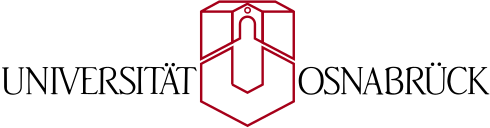
# <center>Einführung in die Künstliche Intelligenz</center> <a class="tocSkip">
### <center>Wintersemester 2020/21</center> <a class="tocSkip">
<center>Prof. Dr. Joachim Hertzberg, Felix Igelbrink, Alexander Mock</center>

# Übungsblatt 8: Bayes-Netze

## Aufgabe: Kraftwerksicherheit

In einem Kernkraftwerk gibt es eine Alarmanlage, die dadurch ausgelöst wird, dass die Anzeige eines Instruments zur Kerntemperaturmessung einen bestimmten Wert überschreitet.
Je höher die Kerntemperatur ist, desto wahrscheinlicher ist eine Fehlfunktion des Instruments.

Gegeben seien nun die booleschen Variablen $A$ (Alarm ertönt), $F_A$ (fehlerhaft Alarmanlage, s.u.), $F_G$ (fehlerhaftes Messinstrument, s.u.) sowie die mehrwertigen Knoten $G$ (Instrumentenanzeige) und $T$ (tatsächliche Kerntemperatur).

### 
Zeichnen Sie für dieses Beispiel ein Bayes-Netz. Nutzen Sie dazu die vorgegebene Funktion `draw_graph`. Diese visualisiert einen zuvor erstellten `networkx`-Graphen. 

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib notebook

"""
Draw a networkx graph

layout: nx.spring_layout (default), nx.planar_layout, ... (see https://networkx.org/documentation/stable/reference/drawing.html)
"""
def draw_graph(G, layout=nx.spring_layout):
    
    pos = layout(G)
    plt.figure()
    
    # generate node labels
    node_labels = {}
    for node,data in G.nodes(data=True):
        label = str(node)
        for k,v in data.items():
            label += '\n' + str(k) + '=' + str(v)
        node_labels[node] = label
    
    # draw nodes, node labels and edges            
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1,\
        node_size=2000, node_color='pink', alpha=0.9,\
        labels=node_labels)
    
    # generate edge labels
    edge_labels = {}
    for v1,v2,w in G.edges(data=True):
        if w:
            wit = list(w.items())
            k,v = wit.pop()
            label = str(k) + '=' + str(v)
            for k,v in wit:
                label += '\n' + str(k) + '=' + str(v)
            edge_labels[(v1, v2)] = label
            
    # draw edge labels
    nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels,font_color='red')
    plt.axis('off')
    plt.show()

<IPython.core.display.Javascript object>


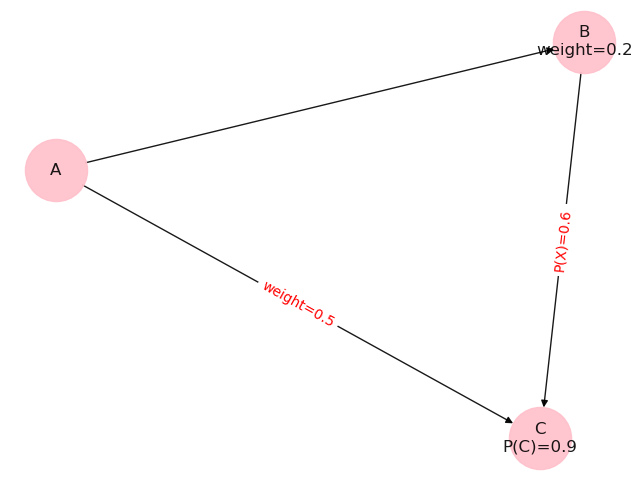

In [5]:
## Example draw_graph:
import networkx as nx

##########
### 1. Define Graph Type: See Networkx docs
##########
# G = nx.Graph()
G = nx.DiGraph()

##########
### 2. Add Nodes and Node attributes
##########
G.add_node('A')
G.add_node('B', weight=0.2) # simple attribute of name 'weight' and value '0.2'
G.add_node('C', **{"P(C)":0.9}) # if name of attribute could be interpreted as python function

###########
### 3. Add Edges and Edge attributes
###########
G.add_edge('A', 'B')
G.add_edge('A', 'C', weight=0.5)
G.add_edge('B', 'C', **{"P(X)":0.6})

draw_graph(G)


<IPython.core.display.Javascript object>


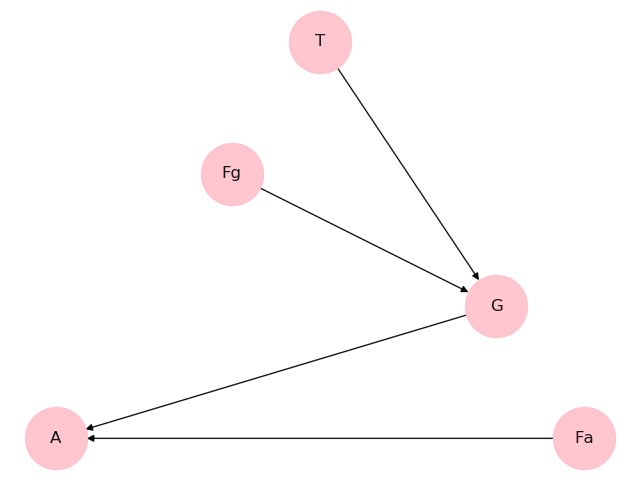

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
    
G = nx.DiGraph()

# Alarm ertoent
G.add_node('A')

# fehlerhafte Alarmanlage
G.add_node('Fa')

# fehlerhaftes Messinstrument
G.add_node('Fg')

# Instrumentanzeige
G.add_node('G')

# tatsaechliche Kerntemperatur
G.add_node('T')



# die Temperatur hat direkten Einfluss auf die Anzeige des Instruments
G.add_edge('T', 'G')

# eine fehlerhafte Alarmanlage kann dafuer sorgen, dass der Alarm ertoent
G.add_edge('Fa', 'A')

# ein fehlerhaftes Messinstrument kann dafuer sorgen, dass falsche Werte auf der
# Instrumentanzeige angezeigt werden
G.add_edge('Fg', 'G')

# wenn die Instrumentanzeige den Wert ueberschreitet, wird der Alarm ausgeloest
G.add_edge('G', 'A')


draw_graph(G, layout=nx.planar_layout)

### 
Befindet sich das Messinstrument $G$ in einem technisch einwandfreiem Zustand ($F_G = \textit{falsch}$), so zeigt es mit Wahrscheinlichkeit $x$ einen falschen Wert an.
Ist es defekt ($F_G = \textit{wahr}$), so wird mit einer Wahrscheinlichkeit von $y$ ein falscher Wert angezeigt.
Angenommen, es gibt jeweils nur zwei Temperaturwerte für $G$ und $T$, *normal* und *hoch*.
Wie sieht die bedingte Wahrscheinlichkeitsverteilung für $G$ aus?

| G | (Fg=falsch, T=hoch) | (Fg=wahr, T=normal) |
|:-----:|:-----:|:-----:|
| hoch | $1 - x$ | $y$ |
| normal | $x$ | $1 - y$ |

### 
Ein Alarm ertönt genau dann, wenn wenn als Temperatur *hoch* gemessen wird und die Alarmanlage korrekt arbeitet.
Wie berechnet sich die bedingte Wahrscheinlichkeitsverteilung für $A$, gegeben die Alarmanlage arbeitet korrekt ($F_A = \textit{falsch}$). Unterscheidet sich dies von dem Fall $F_A = \textit{wahr}$?

$P(A | Fa) = P(A) * P(G | Fg, T)$

### 
Ein weiteres Messinstrument $H$ wird eingebaut, so dass nun ein Alarm ertönt, wenn mindestens eine der beiden Anzeigen *hoch* anzeigt.
Erweitern Sie das Netz um die Knoten $H$ und $F_H$ (Instrument $H$ ist defekt). Nutzen Sie dazu wieder die Funktion `draw_graph`.

<IPython.core.display.Javascript object>


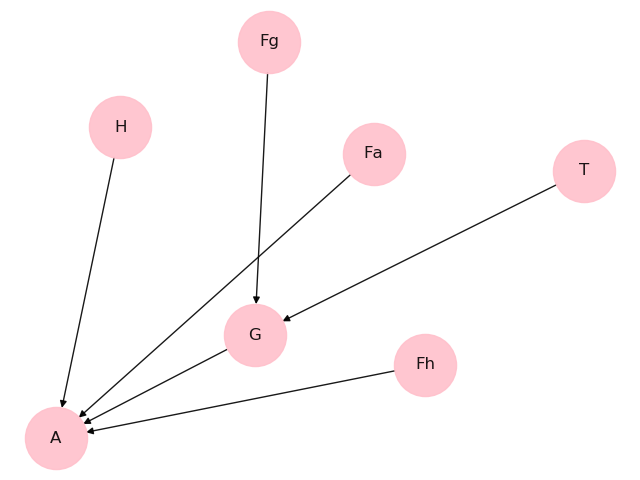

In [9]:
import networkx as nx
    
G = nx.DiGraph()

# Alarm ertoent
G.add_node('A')

# fehlerhafte Alarmanlage
G.add_node('Fa')

# fehlerhaftes Messinstrument
G.add_node('Fg')

# Instrumentanzeige
G.add_node('G')

# tatsaechliche Kerntemperatur
G.add_node('T')

# zusaetzliches Instrument
G.add_node('H')

# zusaetzliches Instrument ist defekt
G.add_node('Fh')



# die Temperatur hat direkten Einfluss auf die Anzeige des Instruments
G.add_edge('T', 'G')

# eine fehlerhafte Alarmanlage kann dafuer sorgen, dass der Alarm ertoent
G.add_edge('Fa', 'A')

# ein fehlerhaftes Messinstrument kann dafuer sorgen, dass falsche Werte auf der
# Instrumentanzeige angezeigt werden
G.add_edge('Fg', 'G')

# wenn die Instrumentanzeige den Wert ueberschreitet, wird der Alarm ausgeloest
G.add_edge('G', 'A')

# wenn das zusaetzliche Instrument defekt ist, kann ein falscher Alarm ausgeloest werden
G.add_edge('Fh', 'A')

# das zusaetzliche Instrument kann auch einen Alarm ausloesen
G.add_edge('H', 'A')

draw_graph(G)

### 
Wie lautet in dem erweiterten Netz die Markowhülle des Knotens $G$?

H, Fa und Fh, da sie keine Kindknoten oder Elternknoten von G sind.

## Aufgabe: Autodiagnose

Betrachten Sie das unten abgebildete Netz zur Autodiagnose. Nehmen Sie an, dass es sich bei den Knoten um jeweils binäre Variablen handelt.

<div>
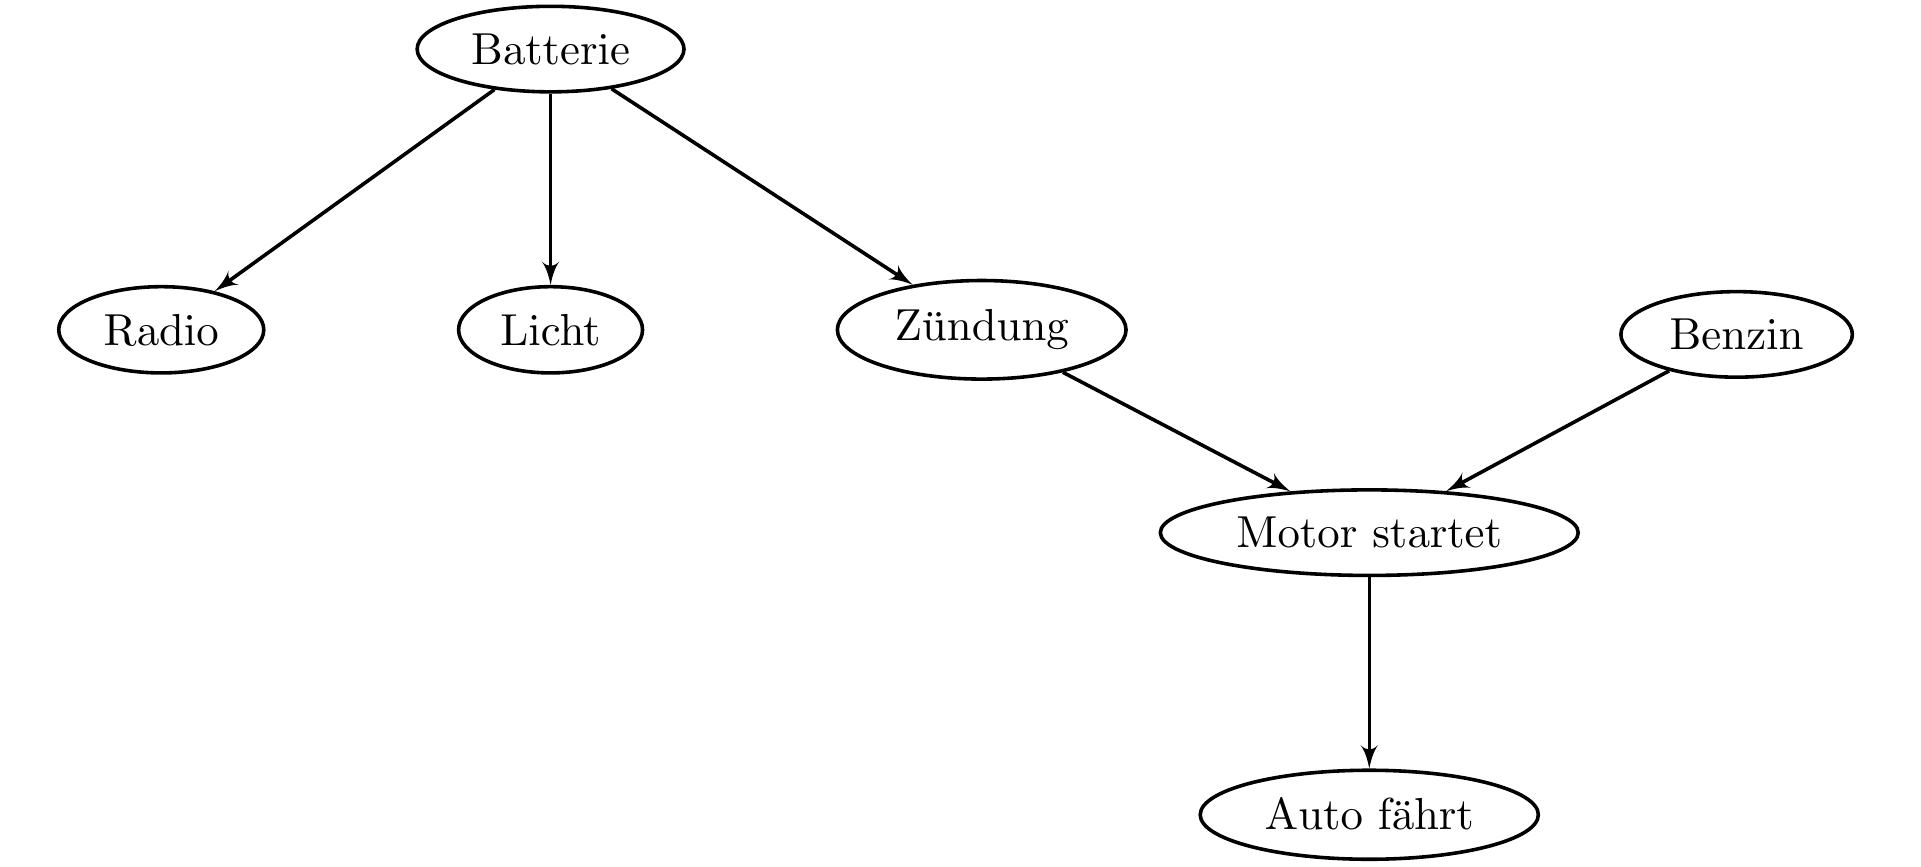 
</div>

Erweitern Sie das Netz an geeigneter Stelle um die beiden binären Variablen `Frost` (wirkt auf die Batterie) und `Anlasser` (Wird von der Zündung gesteuert).

<IPython.core.display.Javascript object>


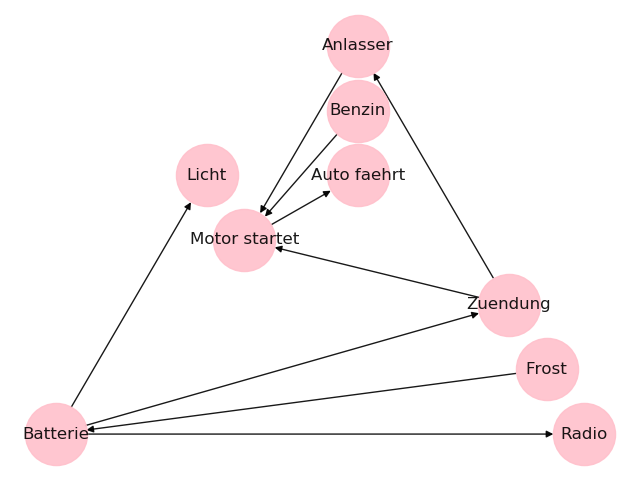

In [13]:
import networkx as nx

G = nx.DiGraph()

G.add_node('Batterie')
G.add_node('Radio')
G.add_node('Licht')
G.add_node('Zuendung')
G.add_node('Benzin')
G.add_node('Motor startet')
G.add_node('Auto faehrt')
G.add_node('Frost')
G.add_node('Anlasser')


G.add_edge('Batterie', 'Radio')
G.add_edge('Batterie', 'Licht')
G.add_edge('Batterie', 'Zuendung')
G.add_edge('Zuendung', 'Motor startet')
G.add_edge('Benzin', 'Motor startet')
G.add_edge('Motor startet', 'Auto faehrt')
G.add_edge('Frost', 'Batterie')
G.add_edge('Zuendung', 'Anlasser')
G.add_edge('Anlasser', 'Motor startet')

draw_graph(G, nx.planar_layout)

### 
Wie viele Einzelwahrscheinlichkeiten umfasst die erweitere vollständige gemeinsame Wahrscheinlichkeitsverteilung ohne das Netz?
Wie viele Einzelwahrscheinlichkeiten umfasst die erweitere vollständige gemeinsame Wahrscheinlichkeitsverteilung mit dem von Ihnen konstruierten Netz?

Ohne Netz: Ich verstehe die Frage nicht ganz, wir haben nur das Netz fuer die Aufgabe, wo sollen wir die Informationen hernehmen??

Mit Netz: Fuer jeden Knoten gibt es eine Einzelwahrscheinlichkeit, also insgesamt 9

### 
Beantworten Sie nun (mit Begründung), ob die folgenden bedingten Unabhängigkeiten durch das Netz dargestellt werden:
- Der Start des Motors ist unabhängig von der Batterie, gegeben das die Zündung funktioniert.
- Das Fahren des Autos ist unabhängig von der Zündung, gegeben die Batterie funktioniert.
- Das Starten des Motors ist unabhängig vom Licht, gegeben die Batterie funktioniert.
- Das Funktionieren der Batterie ist unabhängig vom Benzin, gegeben der Motor startet.
- Das Funktionieren der Zündung ist unabhängig vom Benzin, gegeben die Batterie funktioniert.
- Das Radio ist unabhängig vom Licht, gegeben Benzin ist vorhanden.

1) Ja, denn der Motor ist zwar indirekt von der Batterie abhaengig, aber da die Funktion der Zuendung bekannt ist, heisst das dass die Batterie keinen Einfluss mehr auf den Start des Motors hat.

2) Nein, da das Fahren des Autos auch vom Knoten Benzin abhaengt.

3) Ja, weil durch die Funktion der Batterie gleichzeitig das Licht nicht mehr relevant fuer den Start des Motors ist. Waere die Funktion der Batterie unbekannt, koennte das Licht als Indikator fuer die Funktion der Batterie genutzt werden.

4) Ja, wenn der Motor startet, heisst das indirekt auch dass die Batterie funktioniert, daher ist die Batteriefunktion unabhaengig von dem Wissen, dass Benzin vorhanden ist.

5) Ja, Satz 1 aus dem Skript (Knoten X ist bedingt unabhaengig von allen Nicht-Nachfolgern, gegeben seine Eltern)

6) Nein, weil man durch das Licht darauf schliessen koennte, ob die Batterie funktioniert und somit ob das Radio von der Batterie versorgt wird.

## Aufgabe: Rauchen gefährdet die Gesundheit

Rauchen erhöht die Wahrscheinlichkeiten von sowohl Herz- als auch Lungenkrankheiten.
Diese beiden Krankheitsbilder haben jedoch keinen direkten Einfluss aufeinander:

26 % aller Deutschen rauchen. Von diesen Rauchern erkranken 60 % an Herzkrankheiten und 80 % an Lungenkrankheiten. Nichtraucher hingegen erkranken nur mit einer Wahrscheinlichkeit von 10 % an Herz- und mit 10 % an Lungenkrankheiten.

### 
Konstruieren Sie ein Bayes-Netz mit minimaler Kantenzahl, gegeben die drei binären Zufallsvariablen *Raucher*, *Herzkrankheit* und *Lungenkrankheit*.

<IPython.core.display.Javascript object>


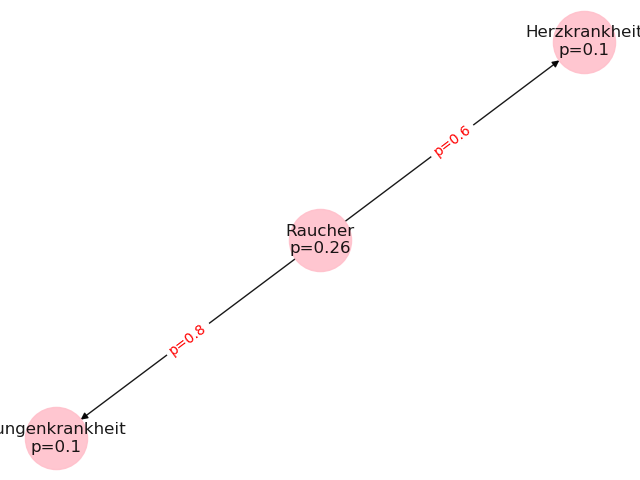

In [19]:
import networkx as nx

G = nx.DiGraph()

G.add_node('Raucher', p=0.26)
G.add_node('Herzkrankheit', p=0.1)
G.add_node('Lungenkrankheit', p=0.1)


G.add_edge('Raucher', 'Herzkrankheit', p=0.6)
G.add_edge('Raucher', 'Lungenkrankheit', p=0.8)


draw_graph(G)

### 
Verwenden Sie obiges Netz, um durch Ausrechnen die Wahrscheinlichkeit zu bestimmen, dass 
- Eine zufällig ausgewählte Person ein Raucher ist, der nicht an einer
  der beiden Krankheiten erkrankt.
- Eine zufällig ausgewählte Person mit Herzkrankheit ein Raucher ist.

Geben Sie alle Rechnungen ausführlich/kleinschrittig an.

1) $1 - (0.26*0.8 + 0.26*0.6) = 0.636$

2) $$

### 
Implementieren Sie eine Lösung für die zweite Anfrage im vorherigen Aufgabenteil über das Ziehen von Stichproben in Python.
 Bei Ihrer Implementierung dürfen Sie annehmen, dass der Pseudo-Zufallszahlengenerator tatsächlich eine Gleichverteilung liefert.
 Testen Sie jeweils mit 100, 1000 und 10000 Samplings und vergleichen Sie Ihre Ergebnisse mit der manuellen Rechnung.

In [ ]:
#TODO: INSERT YOUR CODE HERE


## Aufgabe: Bayes-Netz Modellierung

Im April 2020 stand unter der Schlagzeile "Coronavirus, Grippe oder Allergie?" die unten abgebildete Tabelle in der Neuen Osnabrücker Zeitung. Die Frage war, wie man die von den Symptomen ähnlichen Erkrankungen Allergie, Covid-19, Virusgrippe (Influenza) und Erkältung auseinanderhalten soll.

<div>
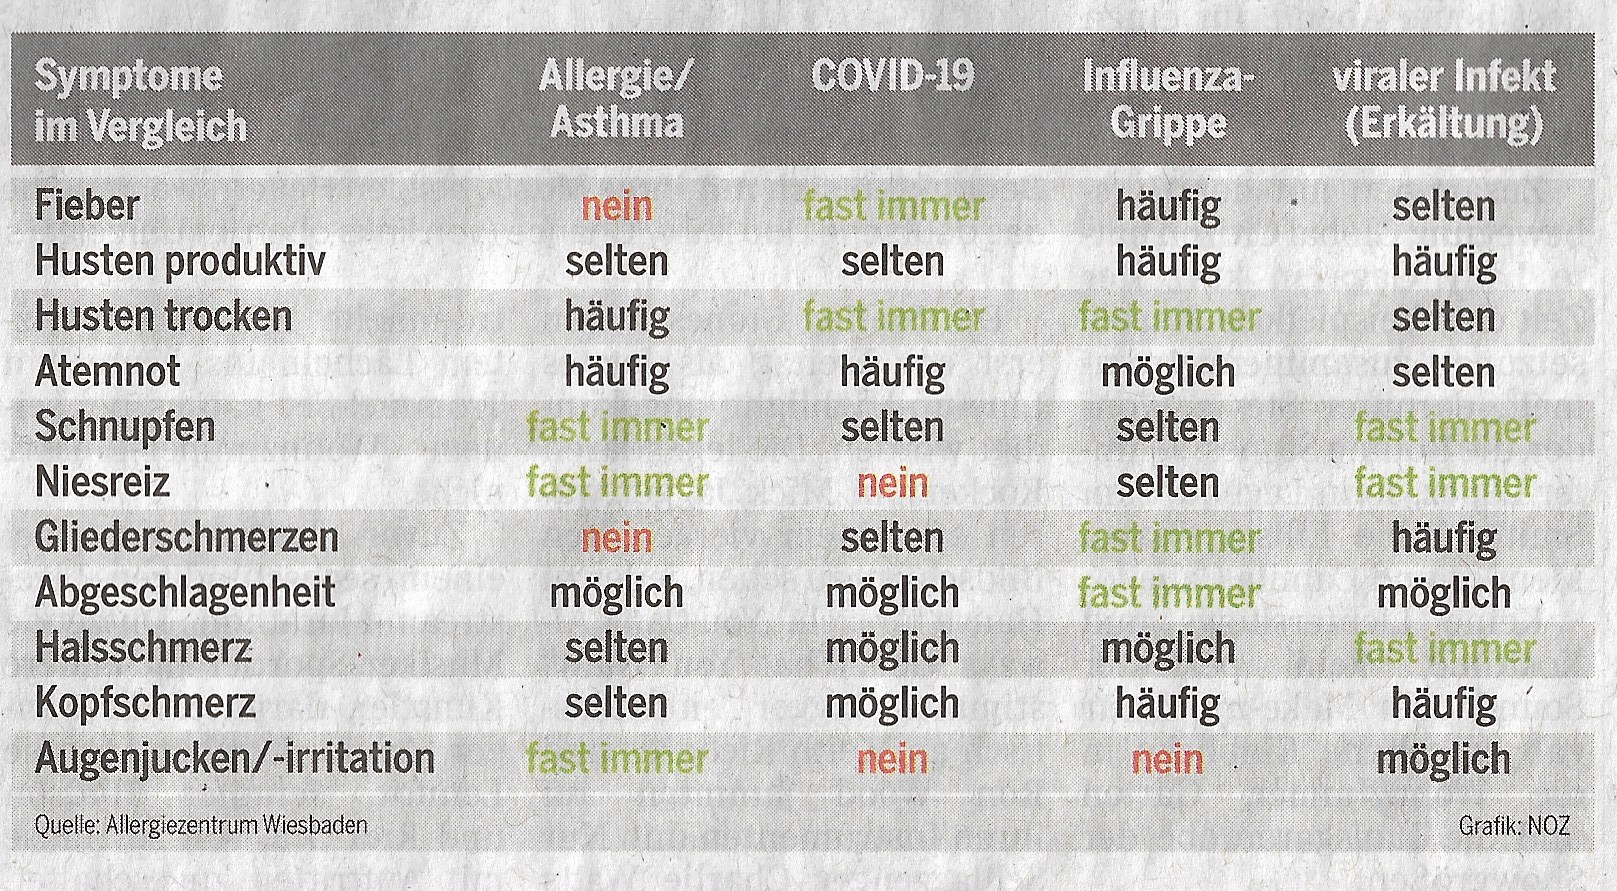 
</div>
Die Tabelle wendet offensichtlich eine probabilistische Zuordnung von Symptomen zu Krankheiten an. Die Einträge sind nicht numerisch, sondern qualitativ. Die Aufgabe ist, die Information aus der Tabelle in einem Bayes-Netz zu modellieren und anschließend Fragen dazu zu beantworten. 

### 
Wie sieht das Netz aus? Was sind die Zufallsvariablen? Was sind abhängige Variablen und was hängt wovon ab?

<IPython.core.display.Javascript object>


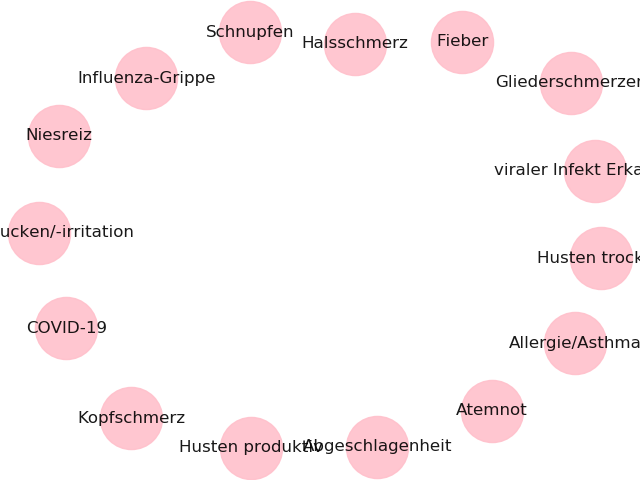

In [21]:
import networkx as nx

G = nx.DiGraph()

G.add_node('Fieber')
G.add_node('Husten produktiv')
G.add_node('Husten trocken')
G.add_node('Atemnot')
G.add_node('Schnupfen')
G.add_node('Niesreiz')
G.add_node('Gliederschmerzen')
G.add_node('Abgeschlagenheit')
G.add_node('Halsschmerz')
G.add_node('Kopfschmerz')
G.add_node('Augenjucken/-irritation')

G.add_node('Allergie/Asthma')
G.add_node('COVID-19')
G.add_node('Influenza-Grippe')
G.add_node('viraler Infekt Erkaeltung')


draw_graph(G)

Die Knoten sind zum einen die Symptome und zum anderen die Erkrankungen. Es existieren Kanten zwischen den einzelnen Symptomen und Kanten zwischen den Symptomen und den Erkrankungen. Die Wahrscheinlichkeiten stellen die qualitativen Eintraege dar. Das heisst die Symptome koennen untereinander voneinander abhaengen, und die Erkrankungen haengen wiederum von den Symptomen und ihrer Wahrscheinlichkeit ab.

### 

Modellieren Sie Ihr Bayes-Netz in Python.
Dazu können Sie das Paket [`pomegranate`](https://pomegranate.readthedocs.io/en/latest/index.html) verwenden, welches Sie mit
```bash
      conda install pomegranate
```
installieren können.
Für die qualitativen Wahrscheinlichkeiten der Tabelle übersetzen Sie bitte:
- *fast immer*= 0.95 
- *häufig* = 0.8
- *möglich* = 0.5 
- *selten* = 0.2 
- *nein* = 0.01

Stellen Sie unter dieser Interpretation die Wahrheitstabellen der abhängigen Variablen auf. Bedenken Sie, dass nicht nur 1 Krankheit zur Zeit vorliegen kann. Welche W'keit nehmen Sie in diesem Fall? Die Tabelle sagt weiter nichts über die W'keiten der a-priori-Variablen. Bitte wählen Sie die nach Intuition. (In einer ernsten Anwendung müsste hier natürlich reale statistische Information über das Vorliegen der entsprechenden Variablen eingehen.)

In [ ]:
#TODO: INSERT YOUR CODE HERE


### 
Ein Freund berichtet Ihnen, dass er Fieber und trockenen Husten hat; auf Ihre diagnostischen Nachfragen sagt er, er hat keinen produktiven Husten, keinen Niesreiz, keine Gliederschmerzen und kein Augenjucken. Was sagt Ihr Bayes-Netz zu der Frage, welche Krankheit(en) er vermutlich hat? Sollten Sie ihn besuchen gehen?

In [ ]:
#TODO: INSERT YOUR CODE HERE
